# Introduction to Pandas
----------------------------------------------------------------------------
## Goals:
* Learn how to use pandas dataframes
* Plot basic charts using dataframes and matplotlib

Reference: 
* https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html
* https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
* https://pandas.pydata.org/pandas-docs/stable/reference/series.html

It is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

### Import pandas library

In [1]:
import pandas as pd

Pandas is well suited for many different kinds of data:
* Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

Data structures in pandas are:

* Series objects: 1D array, similar to a column in a spreadsheet
* DataFrame objects: 2D table, similar to a spreadsheet
* Panel objects: Dictionary of DataFrames, similar to sheet in MS Excel

### Create a Serie
A 1D array similar to a column in spreadsheet

In [2]:
import pandas as pd
import numpy as np

ndarray = np.array(['a','b','c','d'])
serie = pd.Series(ndarray)
print(serie)

0    a
1    b
2    c
3    d
dtype: object


### Create a data frame
A dataframe is the tabular representation of data. Think of a dataframe as a spreadsheet with column headers and rows.

In [3]:
dog_data=[
    ['Pedro','Doberman',3],\
    ['Clementine','Golden Retriever',8],\
    ['Norah','Great Dane',6],\
    ['Mabel','Austrailian Shepherd',1],\
    ['Bear','Maltese',4],\
    ['Bill','Great Dane',10]
]

In [4]:
dog_df=pd.DataFrame(dog_data,columns=['name','breed','age'])
dog_df

,name,breed,age
0,Pedro,Doberman,3
1,Clementine,Golden Retriever,8
2,Norah,Great Dane,6
3,Mabel,Austrailian Shepherd,1
4,Bear,Maltese,4
5,Bill,Great Dane,10


In [5]:
print(type(dog_df['age'].iloc[0]))

<class 'numpy.int64'>


### Previewing the data frame

[**DataFrame.head(n=5)**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head)
* This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it

In [6]:
dog_df.head()

,name,breed,age
0,Pedro,Doberman,3
1,Clementine,Golden Retriever,8
2,Norah,Great Dane,6
3,Mabel,Austrailian Shepherd,1
4,Bear,Maltese,4


[**DataFrame.tail(n=5)**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail)
* This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows

In [7]:
dog_df.tail(3)

,name,breed,age
3,Mabel,Austrailian Shepherd,1
4,Bear,Maltese,4
5,Bill,Great Dane,10


[**DataFrame.shape**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape)
* Return a tuple representing the dimensionality of the DataFrame.

In [8]:
dog_df.shape

(6, 3)

In [9]:
len(dog_df)

6

[**DataFrame.columns**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns)
* The column labels of the DataFrame

In [10]:
dog_df.columns

Index(['name', 'breed', 'age'], dtype='object')

[**DataFrame.dtypes**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html#pandas.DataFrame.dtypes)
* Return the dtypes in the DataFrame.
* This returns a Series with the data type of each column.
* The result’s index is the original DataFrame’s columns.
* Columns with mixed types are stored with the object dtype.

In [11]:
dog_df.dtypes

name     object
breed    object
age       int64
dtype: object

[**DataFrame.values**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html#pandas.DataFrame.values)
* Return a Numpy representation of the DataFrame.
* Python documentation recommends using DataFrame.to_numpy() instead.
* Only the values in the DataFrame will be returned, the axes labels will be removed.

In [12]:
dog_df.values

array([['Pedro', 'Doberman', 3],
       ['Clementine', 'Golden Retriever', 8],
       ['Norah', 'Great Dane', 6],
       ['Mabel', 'Austrailian Shepherd', 1],
       ['Bear', 'Maltese', 4],
       ['Bill', 'Great Dane', 10]], dtype=object)

[**DataFrame.describe(percentiles=None, include=None, exclude=None)**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)
* Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
* Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided.

In [13]:
dog_df.describe()

,age
count,6.000000
mean,5.333333
std,3.326660
min,1.000000
25%,3.250000
50%,5.000000
75%,7.500000
max,10.000000


[**Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
* Return a Series containing counts of unique values.
* The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [14]:
dog_df['breed'].value_counts()

Great Dane              2
Austrailian Shepherd    1
Doberman                1
Maltese                 1
Golden Retriever        1
Name: breed, dtype: int64

### Sorting

### Selecting/Querying

In [15]:
dog_df[['name','age']]

,name,age
0,Pedro,3
1,Clementine,8
2,Norah,6
3,Mabel,1
4,Bear,4
5,Bill,10


[**DataFrame.iloc**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc)
* Purely integer-location based indexing for selection by position.
* .iloc[] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array.

Allowed inputs are:

* An integer, e.g. 5.
* A list or array of integers, e.g. [4, 3, 0].
* A slice object with ints, e.g. 1:7.
* A boolean array.
* A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above). This is useful in method chains, when you don’t have a reference to the calling object, but would like to base your selection on some value.

In [16]:
dog_df.iloc[2:4]

,name,breed,age
2,Norah,Great Dane,6
3,Mabel,Austrailian Shepherd,1


In [17]:
dog_df.iloc[1:4, 0:2]

,name,breed
1,Clementine,Golden Retriever
2,Norah,Great Dane
3,Mabel,Austrailian Shepherd


In [18]:
dog_df[dog_df['breed'].isin(['Great Dane', 'Maltese'])]

,name,breed,age
2,Norah,Great Dane,6
4,Bear,Maltese,4
5,Bill,Great Dane,10


In [19]:
dog_df[dog_df['name']=='Norah']

,name,breed,age
2,Norah,Great Dane,6


In [20]:
dog_df[(dog_df['name']=='Bill') & (dog_df['breed']=='Great Dane')]

,name,breed,age
5,Bill,Great Dane,10


In [21]:
dog_df[dog_df['age']<5]

,name,breed,age
0,Pedro,Doberman,3
3,Mabel,Austrailian Shepherd,1
4,Bear,Maltese,4


In [22]:
dog_df[dog_df['breed'].str.contains('G')]

,name,breed,age
1,Clementine,Golden Retriever,8
2,Norah,Great Dane,6
5,Bill,Great Dane,10


### Combining data frames

In [23]:
owner_data=[['Bilbo','Pedro'],['Gandalf','Bear'],['Sam','Bill']]
owner_df=pd.DataFrame(owner_data,columns=['owner_name','dog_name'])

**[DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)**
* Merge DataFrame or named Series objects with a database-style join.
* The join is done on columns or indexes. If joining columns on columns, the DataFrame indexes will be ignored. Otherwise if joining indexes on indexes or indexes on a column or columns, the index will be passed on

In [24]:
df=pd.merge(owner_df,dog_df,left_on='dog_name',right_on='name',how='inner')

In [25]:
df

,owner_name,dog_name,name,breed,age
0,Bilbo,Pedro,Pedro,Doberman,3
1,Gandalf,Bear,Bear,Maltese,4
2,Sam,Bill,Bill,Great Dane,10


More details on merge parameters:
* **right** : DataFrame
* **how** : {‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘inner’
  * left: use only keys from left frame, similar to a SQL left outer join; preserve key order
  * right: use only keys from right frame, similar to a SQL right outer join; preserve key order
  * outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically
  * inner: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys
* **on** : label or list. Column or index level names to join on. These must be found in both DataFrames. If on is None and not merging on indexes then this defaults to the intersection of the columns in both DataFrames.
* **left_on** : label or list, or array-like. Column or index level names to join on in the left DataFrame. Can also be an array or list of arrays of the length of the left DataFrame. These arrays are treated as if they are columns.
* **right_on** : label or list, or array-like Column or index level names to join on in the right DataFrame. Can also be an array or list of arrays of the length of the right DataFrame. These arrays are treated as if they are columns.

Reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

| Merge method | SQL Join Name | Description |
| -------------|---------------|-------------|
| left | LEFT OUTER JOIN | Use keys from left frame only | 
| right | RIGHT OUTER JOIN | Use keys from right frame only |
| outer | FULL OUTER JOIN | Use union of keys from both frames |
| inner | INNER JOIN | Use intersection of keys from both frames |

### Inner Merge

In [26]:
inner_df = owner_df.merge(dog_df, left_on='dog_name', right_on='name', how='inner')

In [27]:
inner_df

,owner_name,dog_name,name,breed,age
0,Bilbo,Pedro,Pedro,Doberman,3
1,Gandalf,Bear,Bear,Maltese,4
2,Sam,Bill,Bill,Great Dane,10


In [28]:
inner_df=inner_df.drop(['name'],axis=1)

In [29]:
inner_df

,owner_name,dog_name,breed,age
0,Bilbo,Pedro,Doberman,3
1,Gandalf,Bear,Maltese,4
2,Sam,Bill,Great Dane,10


### Left Merge

In [30]:
left_df = owner_df.merge(dog_df, left_on='dog_name', right_on='name', how='left')

In [31]:
left_df

,owner_name,dog_name,name,breed,age
0,Bilbo,Pedro,Pedro,Doberman,3
1,Gandalf,Bear,Bear,Maltese,4
2,Sam,Bill,Bill,Great Dane,10


### Right Merge

In [32]:
right_df = owner_df.merge(dog_df, left_on='dog_name', right_on='name', how='right')

In [33]:
right_df

,owner_name,dog_name,name,breed,age
0,Bilbo,Pedro,Pedro,Doberman,3
1,NaN,NaN,Clementine,Golden Retriever,8
2,NaN,NaN,Norah,Great Dane,6
3,NaN,NaN,Mabel,Austrailian Shepherd,1
4,Gandalf,Bear,Bear,Maltese,4
5,Sam,Bill,Bill,Great Dane,10


### Outer Merge

In [34]:
outer_df = owner_df.merge(dog_df, left_on='dog_name', right_on='name', how='outer')

In [35]:
outer_df

,owner_name,dog_name,name,breed,age
0,Bilbo,Pedro,Pedro,Doberman,3
1,Gandalf,Bear,Bear,Maltese,4
2,Sam,Bill,Bill,Great Dane,10
3,NaN,NaN,Clementine,Golden Retriever,8
4,NaN,NaN,Norah,Great Dane,6
5,NaN,NaN,Mabel,Austrailian Shepherd,1


### Dropping Columns

[**DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas.DataFrame.drop)
* Drop specified labels from rows or columns.
* Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names. 
* When using a multi-index, labels on different levels can be removed by specifying the level.

In [36]:
df=df.drop(['name'],axis=1)

In [37]:
df

,owner_name,dog_name,breed,age
0,Bilbo,Pedro,Doberman,3
1,Gandalf,Bear,Maltese,4
2,Sam,Bill,Great Dane,10


### Basic plotting

In [38]:
import matplotlib

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. 

In [39]:
# Will allow us to embed images in the notebook
%matplotlib inline

In [40]:
plot_df = pd.DataFrame({
    'col1': [1, 3, 2, 4],
    'col2': [3, 6, 5, 1],
    'col3': [4, 7, 6, 2],
})

[**matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
* Plot y versus x as lines and/or markers.

<AxesSubplot:>

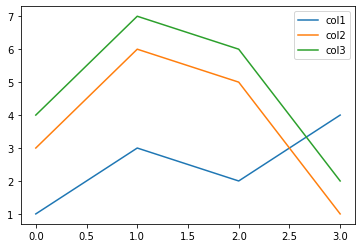

In [41]:
plot_df.plot()

<AxesSubplot:>

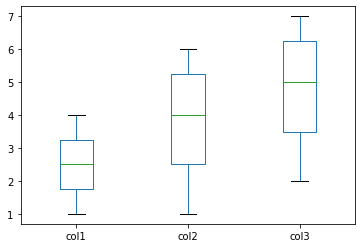

In [42]:
plot_df.plot(kind='box')

<AxesSubplot:>

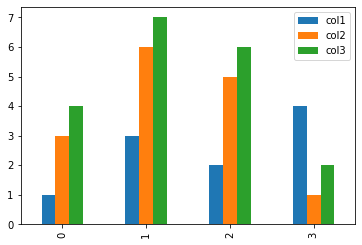

In [43]:
plot_df.plot(kind='bar')